In [11]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

# Read Data

In [12]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
#col_names1 = ['name','slug','value','date_of_information','ranking','region']
# load dataset
data = pd.read_csv("diabetes.csv", header=None,skiprows=1, names=col_names)

In [13]:
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Feature Selection

In [6]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
#feature_cols1 = ['name','slug','value','date_of_information','ranking','region']
X = data[feature_cols] # Features
y = data.label # Target variable

### Splitting Data

In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [18]:
print(X_train)

     pregnant  insulin   bmi  age  glucose  bp  pedigree
88         15      110  37.1   43      136  70     0.153
467         0      100  36.8   25       97  64     0.600
550         1        0  27.4   21      116  70     0.204
147         2      119  30.5   34      106  64     1.400
481         0        0  35.2   29      123  88     0.197
..        ...      ...   ...  ...      ...  ..       ...
645         2      440  39.4   30      157  74     0.134
715         7      392  33.9   34      187  50     0.826
72         13        0  43.4   42      126  90     0.583
235         4        0  43.6   26      171  72     0.479
37          9        0  32.9   46      102  76     0.665

[537 rows x 7 columns]


In [19]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [20]:
#y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6883116883116883


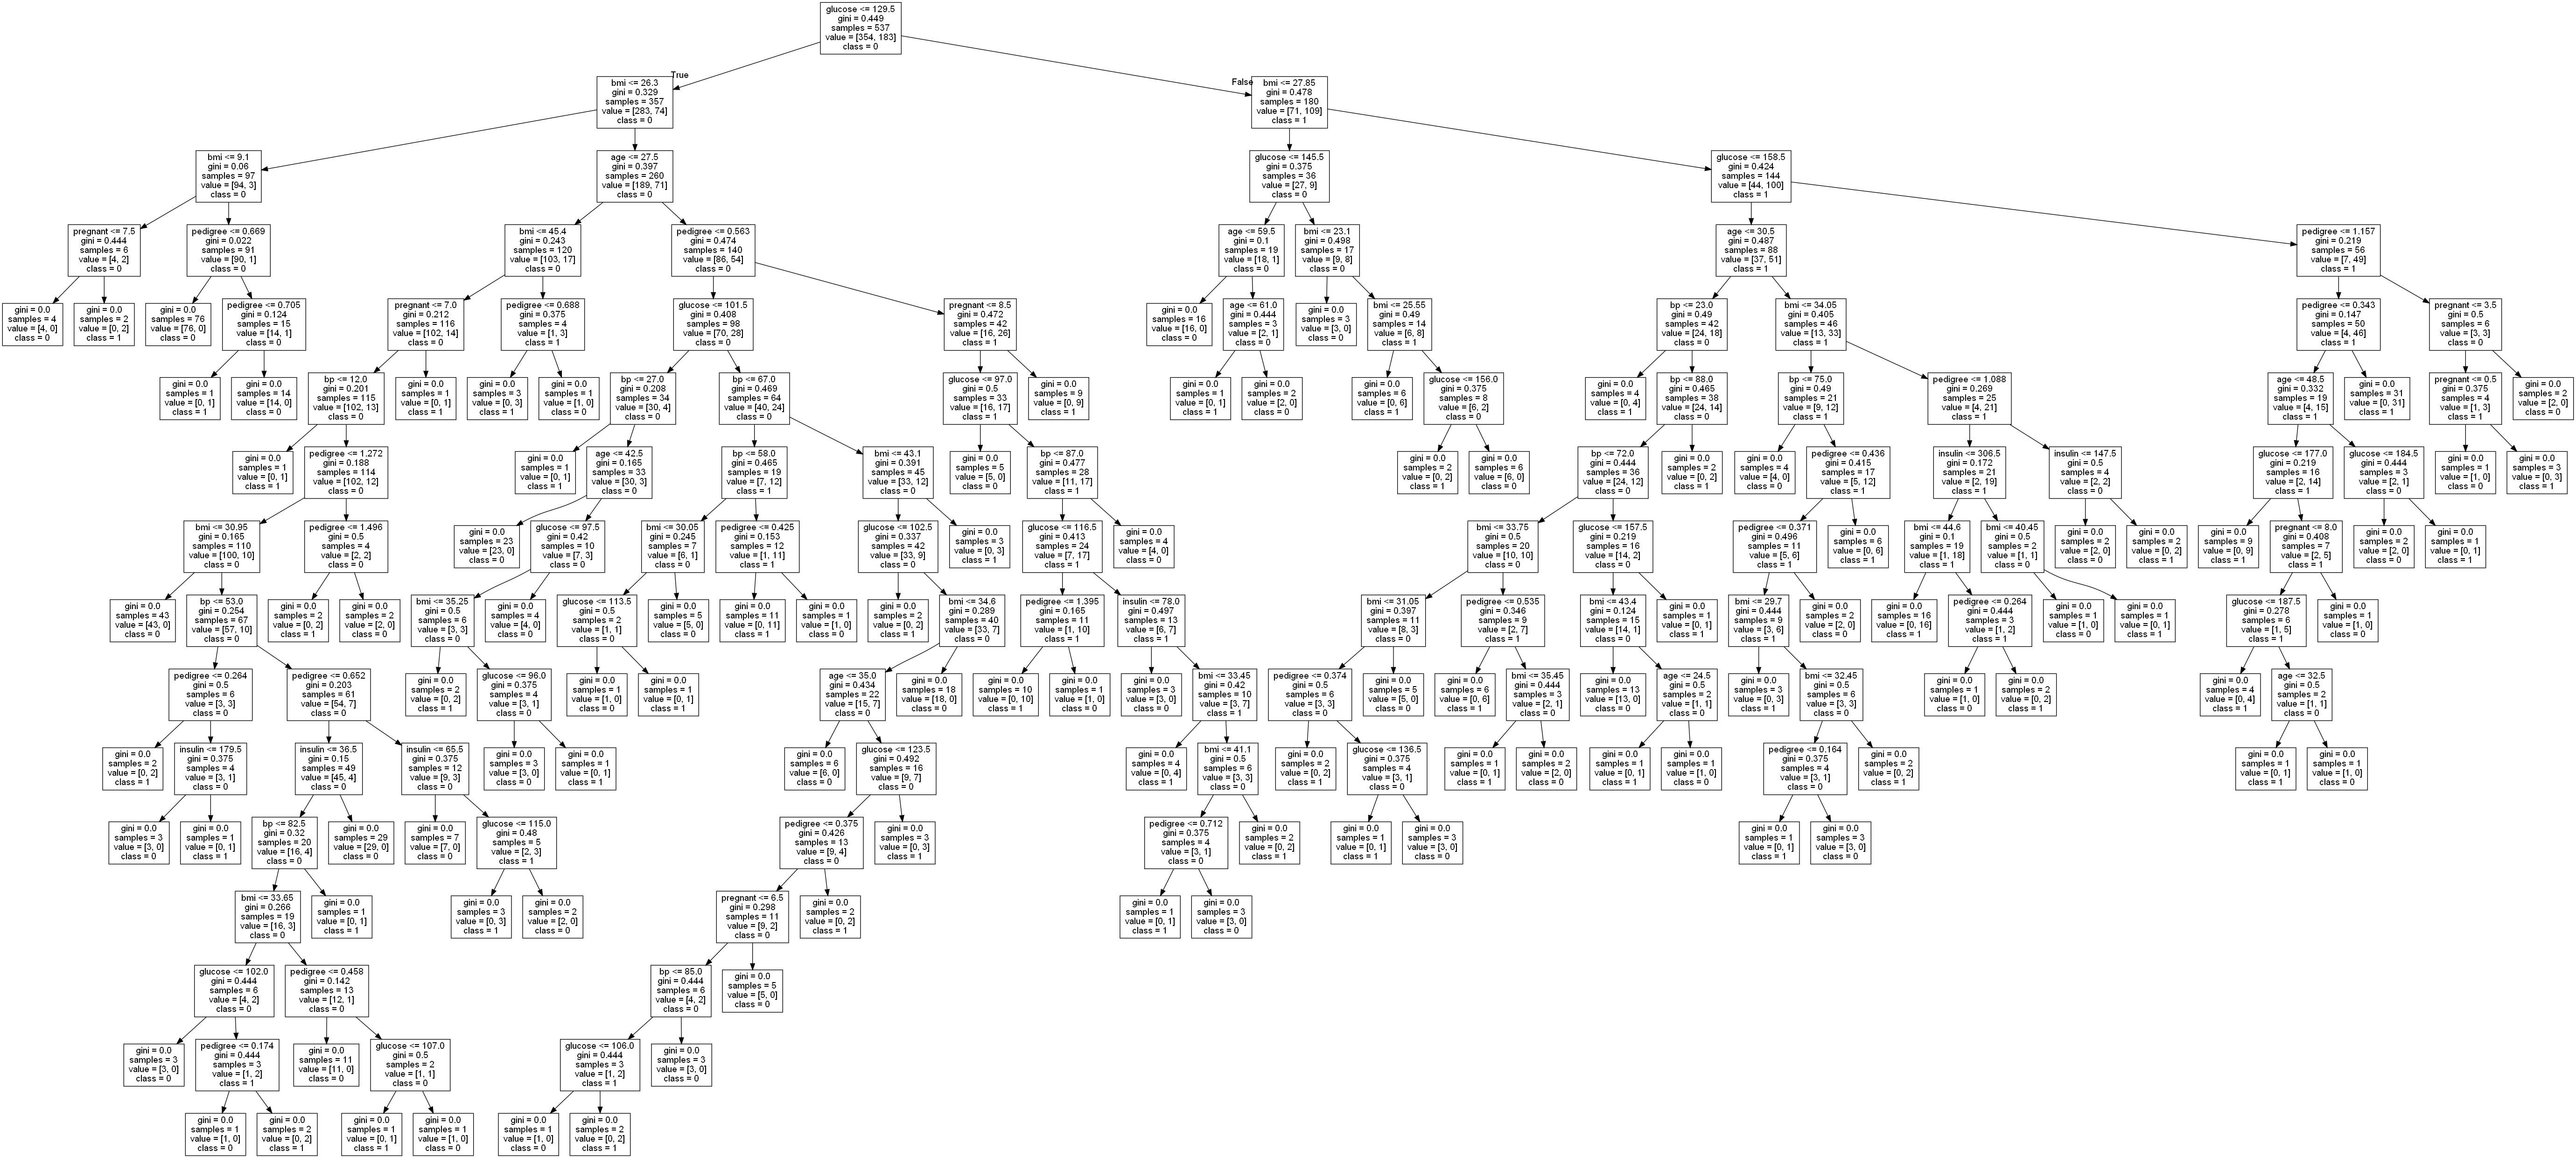

In [11]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,feature_names=feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [12]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6883116883116883


# Visualizing Decision Trees

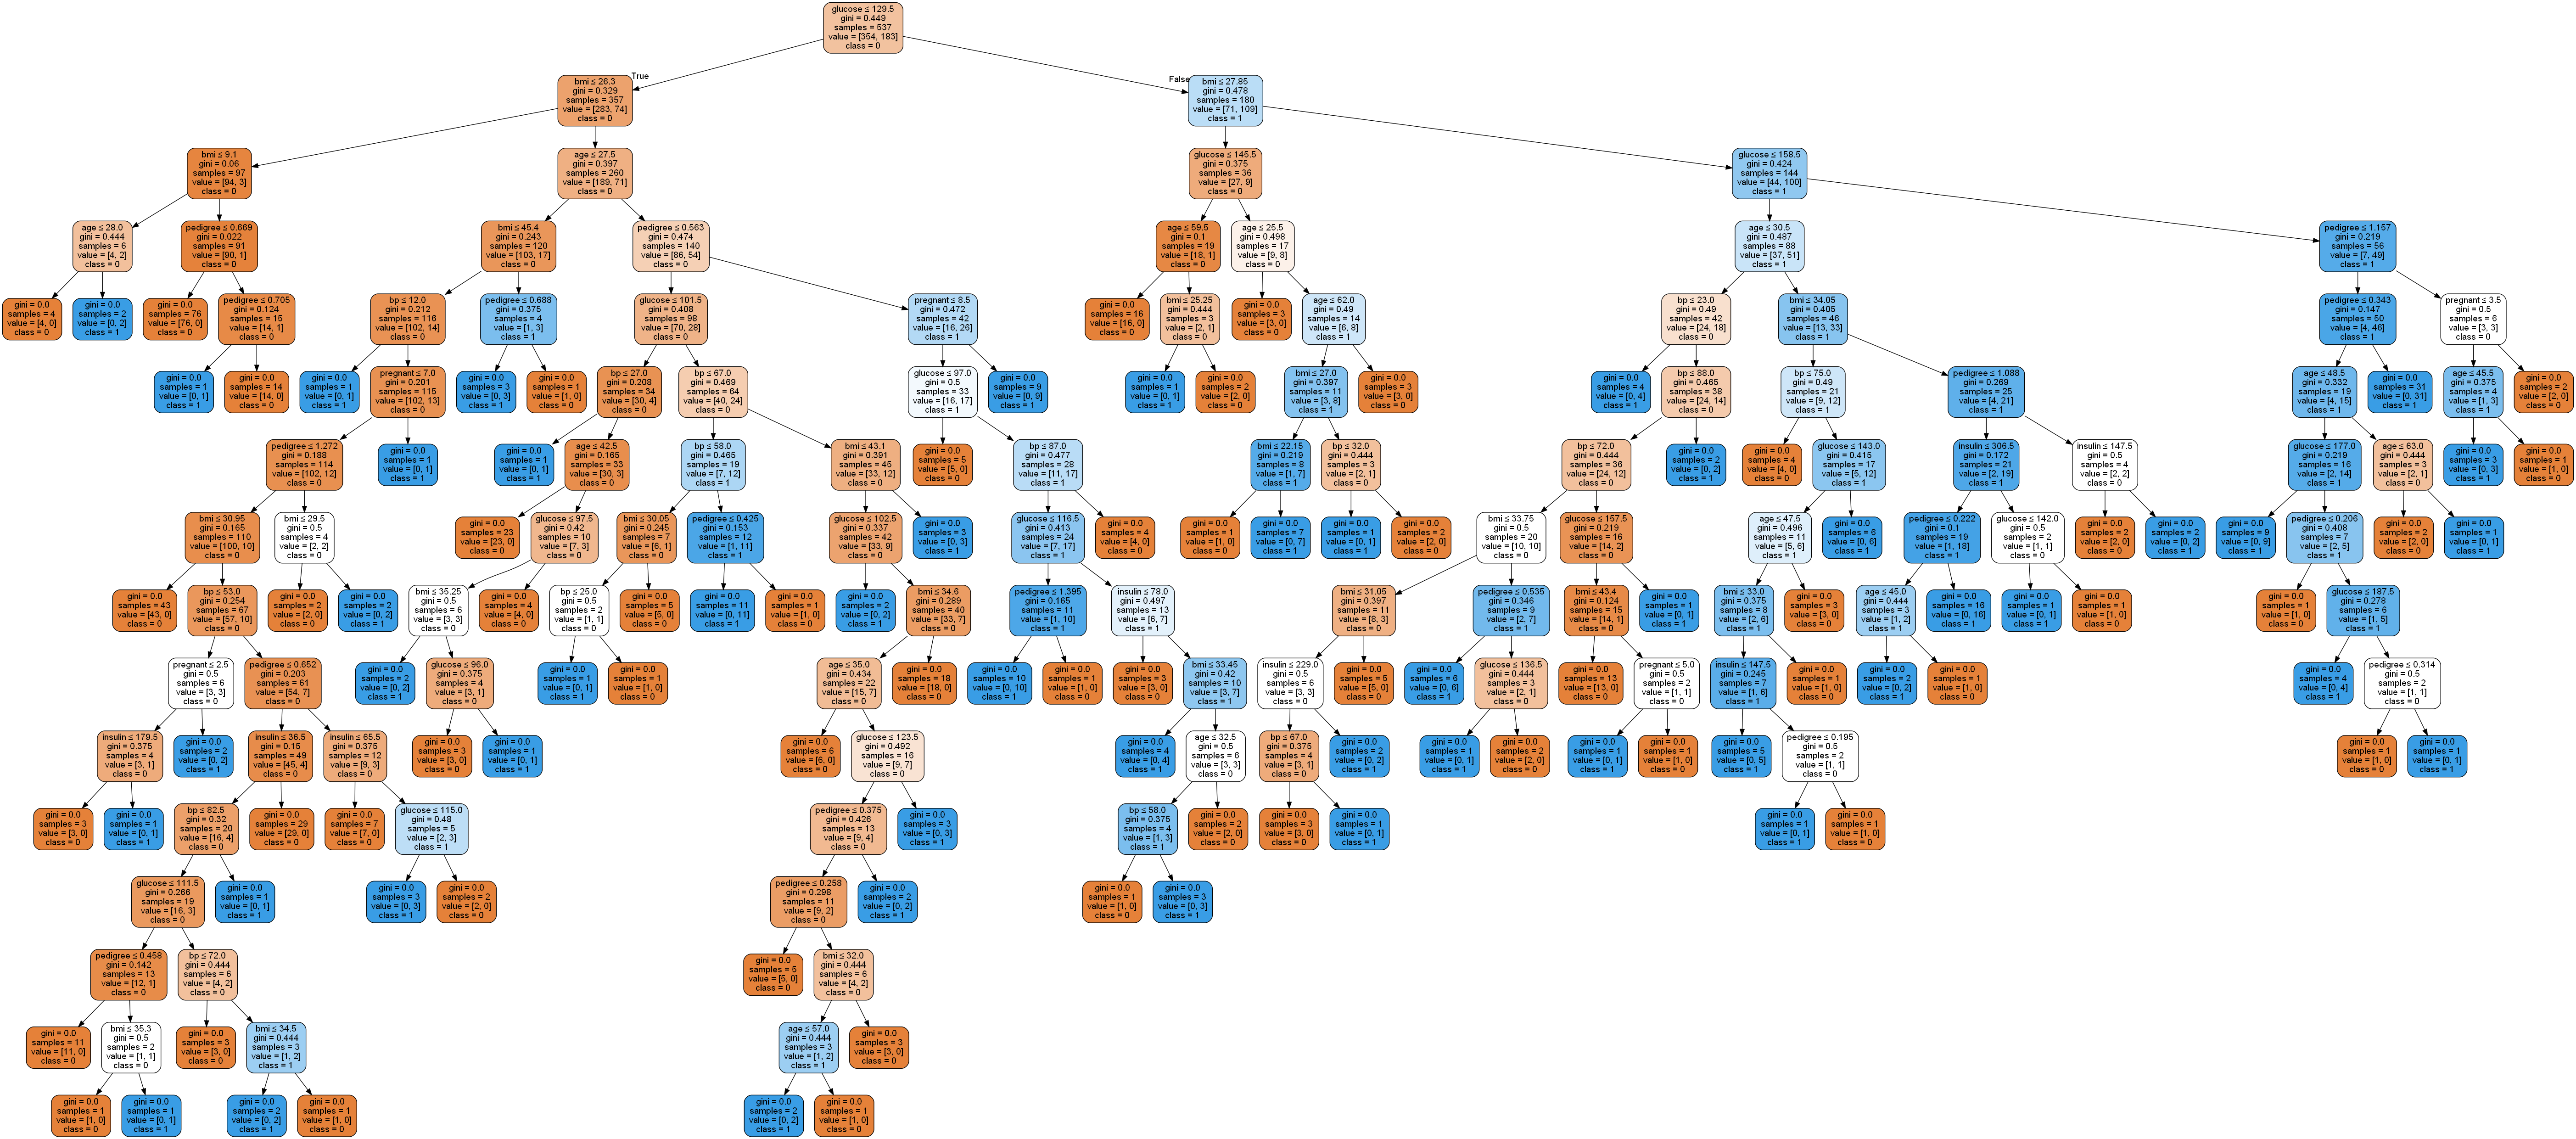

In [13]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())